# *DIAGNOSIS OF HEART DISEASE*

## Initialize

In [52]:
import pandas as pd; # data processing
import numpy as np; # linear algebra
# visual
import matplotlib.pyplot as plt; #plotting data
import seaborn as sns;
import plotly.express as px;
# machine l.
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [33]:
data = pd.read_csv("Heart.csv").iloc[:,1:] # Fist line is patient index

## Inspect the Document

In [35]:
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [37]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [36]:
data.shape

(303, 14)

In [41]:
data.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [44]:
data.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [ ]:
'''
AHD : 'atherosclerotic heart disease' -> object -> to be transformed (ordinal)
Ca : Calcium -> empty should be dropped or filled
Thal: Thalassemia, inherited blood disorder. -> object -> to be dropped as column or transformed
ChestPain : object -> tb. transformed (ordinal encoding)
'''

## Clean or Alter the Document

In [50]:
data["Ca"].fillna(0)

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    0.0
Name: Ca, Length: 303, dtype: float64

In [56]:
transform = OrdinalEncoder()

transform = OrdinalEncoder()
columns_to_encode = ["AHD", "ChestPain", "Thal"]

data[columns_to_encode] = transform.fit_transform(data[columns_to_encode])

In [57]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3.0,145,233,1,2,150,0,2.3,3,0.0,0.0,0.0
1,67,1,0.0,160,286,0,2,108,1,1.5,2,3.0,1.0,1.0
2,67,1,0.0,120,229,0,2,129,1,2.6,2,2.0,2.0,1.0
3,37,1,1.0,130,250,0,0,187,0,3.5,3,0.0,1.0,0.0
4,41,0,2.0,130,204,0,2,172,0,1.4,1,0.0,1.0,0.0


## Data Analysis and Visualization

In [58]:
data.AHD.value_counts()

AHD
0.0    164
1.0    139
Name: count, dtype: int64

In [ ]:
'''
0 : Healthy -> 164 
1 : Sick -> 139
'''

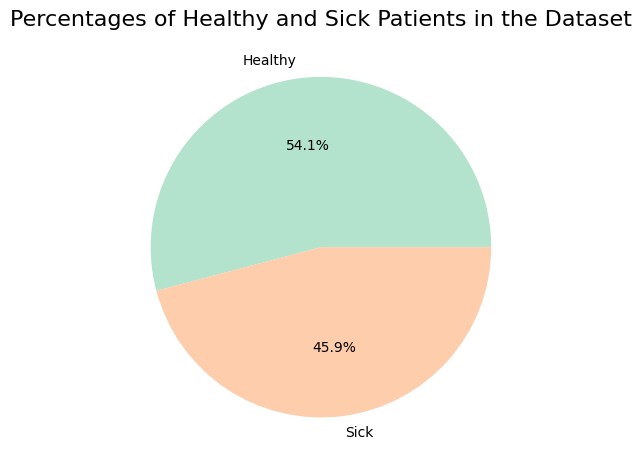

In [95]:
fig, x = plt.subplots()

_ = plt.pie(x = data.AHD.value_counts(), labels = ["Healthy","Sick"], autopct='%1.1f%%',
           colors=plt.cm.Pastel2(range(80)))

x.set_title("Percentages of Healthy and Sick Patients in the Dataset", size = 16)

plt.tight_layout()
plt.show()

## Machine Learning Model